# "Social Network" Analysis

Define:

 - Nodes. This could be characters, parts of speech, syntactic elements, artifacts, whatever you like. 
 - Edges. These are relations between the nodes. They can either be directed or undirected. 

In [18]:
import networkx as nx
import spacy
from itertools import combinations
import collections
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_lg')

In [4]:
moonstone = open('../Texts/moonstone.md').read()

In [5]:
moonstoneParts = moonstone.split('\n## ')

In [6]:
bet, x, clack, bruff, blake = moonstoneParts[2:7]

In [7]:
betParas = bet.split('\n\n')

In [8]:
len(betParas)

1295

In [55]:
combs = list(combinations(names, 2))

In [56]:
names = ['Betteredge', 'Rachel', 'Franklin', 'Rosanna', 'Cuff', 'Diamond', 'Moonstone']

In [9]:
betParsDocs = [nlp(para) for para in betParas]

In [11]:
betParsEntities = [para.ents for para in betParsDocs]

In [13]:
betDoc = nlp(bet)

In [77]:
betEnts = [doc.text for doc in betDoc.ents if doc.text != '###' and doc.label_ == 'GPE']

In [79]:
betEnts

['Yorkshire',
 'India',
 'Yorkshire',
 'England',
 'Providence',
 'London',
 'England',
 'England',
 'Germany',
 'England',
 'Germany',
 'England',
 'London',
 'London',
 'London',
 'Yorkshire',
 'Yorkshire',
 'London',
 'London',
 'India',
 'England',
 'India',
 'England',
 'India',
 'England',
 'London',
 'England',
 'London',
 'London',
 'India',
 'India',
 'England',
 'France',
 'India',
 'Amsterdam',
 'Amsterdam',
 'London',
 'England',
 'Holland',
 'Germany',
 'London',
 'England',
 'London',
 'London',
 'London',
 'England',
 'London',
 'England',
 'China',
 'India',
 'England',
 'India',
 'England',
 'ma’am',
 'England',
 'London',
 'London',
 'India',
 'Amsterdam',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'England',
 'London',
 'London',
 'London',
 'London',
 'London',
 'Yorkshire',
 'ma’am',
 'Yorkshire',
 'Yolland',
 'London',
 'London',
 'London',
 'London',
 'England',
 'London',
 'London',
 'London',
 'Middlesex',
 'Lambeth',
 'London',
 'London

In [80]:
pairs = list(combinations([item[0] for item in collections.Counter(betEnts).most_common(30)], 2))

In [81]:
names = [item[0] for item in collections.Counter(betEnts).most_common(30)]

In [82]:
def countPairsInParas(docParas, pairs):
    counter = {comb: 0 for comb in pairs}
    for para in docParas: 
        for pair in pairs: 
            if pair[0] in para.text and pair[1] in para.text: 
                counter[pair] += 1
    return counter

In [83]:
pairCounter = countPairsInParas(betParsDocs, pairs)

In [84]:
namesTuples = [(pair[0], pair[1], n) 
               for pair, n in pairCounter.items()]

In [85]:
socialGraph = nx.Graph()

In [86]:
socialGraph.add_nodes_from(names)

In [87]:
socialGraph.add_weighted_edges_from(namesTuples)

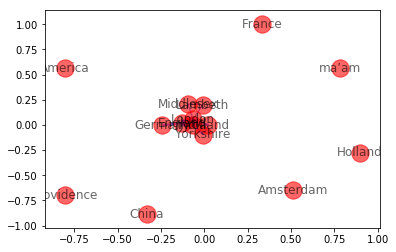

In [90]:
weightsOnly = [t[2] for t in namesTuples]
nx.draw_networkx(socialGraph, 
                 width=weightsOnly,
                 alpha=0.6, edge_color='blue', figsize=(12,8))

In [89]:
def aliases(titleFirstLast): 
    """ Generates aliases for name. 
    Given 'Rosanna Spearman,' returns Miss Rosanna, Miss Spearman, etc. """
    title, first, last = titleFirstLast.split(' ')
    return [first, first + ' ' + last, last, title + ' ' + last, title + ' ' + first]
    

In [57]:
aliases("Miss Rosanna Spearman")

['Rosanna', 'Rosanna Spearman', 'Spearman', 'Miss Spearman', 'Miss Rosanna']

In [60]:
chars = ['Miss Rosanna Spearman', 'Mr. Gabriel Betteredge', 'Mr. Franklin Blake', 
         'Miss Rachel Verinder', 'Lady Julia Verinder', 'Mr. Ezra Jennings']

In [64]:
charAliases = {aliases(char)[0]: aliases(char) for char in chars}

In [65]:
def normalizeName(name): 
    for pair in charAliases.items(): 
        normalized = pair[0]
        listOfAliases = pair[1]
        if name in listOfAliases: 
            return normalized
        

In [66]:
normalizeName('Rosanna Spearman')

'Rosanna'

In [67]:
normalizeName('Mr. Blake')

'Franklin'